In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline


In [74]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [75]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [76]:
team_1 = 'Kings XI Punjab'
team_2 = 'Sunrisers Hyderabad'

# Winning Probability of Teams

Text(0.5, 1.0, 'SRH Total Runs Score Stats Per Count')

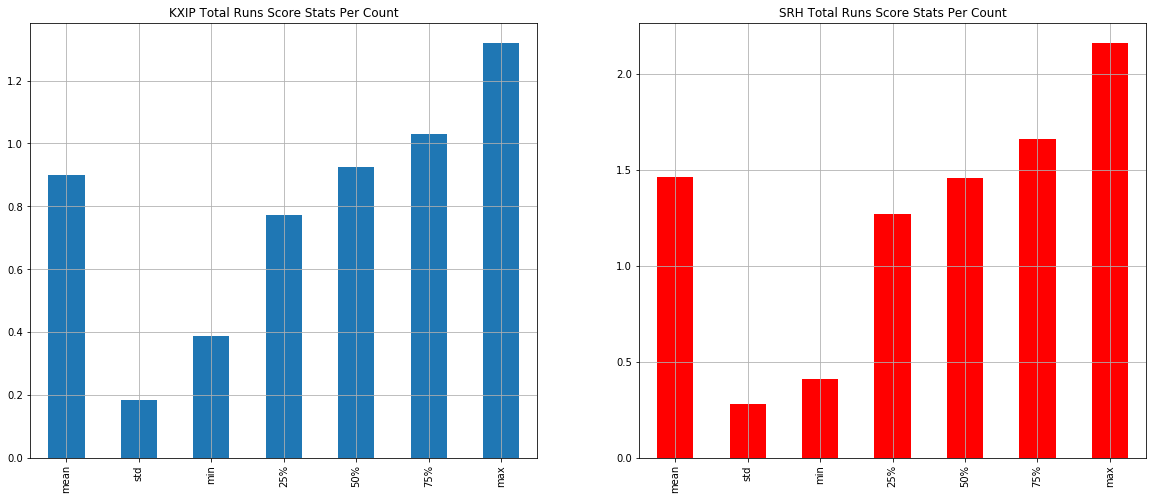

In [77]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
rr_runs = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()['total_runs']
srh_runs = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()['total_runs']
(rr_runs.describe()[1:]/rr_runs.describe()[0]).plot(ax=ax[0], kind='bar', grid=True)
(srh_runs.describe()[1:]/srh_runs.describe()[0]).plot(ax=ax[1], kind='bar', color='red', grid=True)
ax[0].set_title("KXIP Total Runs Score Stats Per Count")
ax[1].set_title("SRH Total Runs Score Stats Per Count")

Text(0.5, 1.0, 'Percentage of Winning')

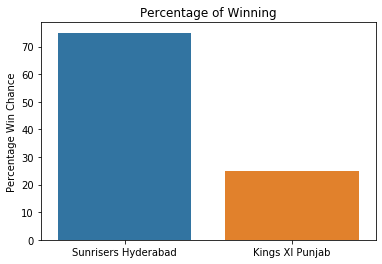

In [78]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

In [79]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

# David Warner Stats

In [80]:
total_matches = len(delivery[(delivery['batsman']=='DA Warner')].match_id.unique())
dismissed_matches = len(delivery[(delivery['batsman']=='DA Warner') & (delivery['player_dismissed']==1)].match_id.unique())
print("Chances of getting out in the match is:", dismissed_matches*100/total_matches, '%')

Chances of getting out in the match is: 86.04651162790698 %


In [81]:
warner_sr = list()
for match_id in delivery[(delivery['batsman']=='DA Warner')].match_id.unique():
    balls = 0
    runs = 0
    for run in delivery[(delivery['batsman']=='DA Warner') & (delivery['match_id']==match_id)]['batsman_runs']:
        balls += 1
        runs += run
        
    sr = runs*100/balls
    warner_sr.append([match_id, sr])
    

warner_sr_df = pd.DataFrame(data=warner_sr, columns = ['match_id', 'SR'])

In [82]:
warner_sr_df['SR'].describe()

count     43.000000
mean     135.131783
std       43.411511
min        0.000000
25%      110.505319
50%      133.333333
75%      160.851064
max      223.076923
Name: SR, dtype: float64

Text(0.5, 1.0, 'Strike Rate Histogram of Warner')

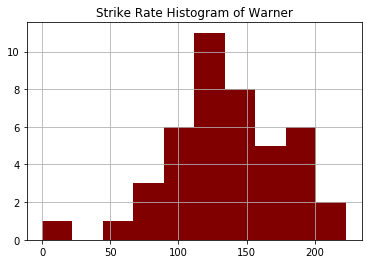

In [83]:
warner_sr_df['SR'].hist(grid=True, color='maroon')
plt.title("Strike Rate Histogram of Warner")

# Rahul Contribution

In [84]:
rahul_contribution = list()
for match_id in delivery[(delivery['batsman']=='KL Rahul')]['match_id'].unique():
    rahul_runs = delivery[(delivery['batsman']=='KL Rahul') & (delivery['match_id']==match_id)]['batsman_runs'].sum()
    rahul_team = delivery[(delivery['batsman']=='KL Rahul') & (delivery['match_id']==match_id)]['batting_team'].unique()[0]
    team_runs = delivery[(delivery['batting_team']==rahul_team) & (delivery['match_id']==match_id)]['batsman_runs'].sum()
    pct_contribution = int(rahul_runs*100/team_runs)
    rahul_contribution.append([match_id, pct_contribution])

rahul_contri = pd.DataFrame(data=rahul_contribution, columns=['match_id', 'pct_contribution'])

count    40.000000
mean     25.425000
std      18.212263
min       0.000000
25%       9.000000
50%      25.500000
75%      40.000000
max      70.000000
Name: pct_contribution, dtype: float64


Text(0.5, 1.0, 'Rahul Contribution Histogram')

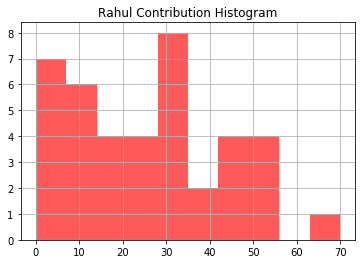

In [92]:
rahul_contri['pct_contribution'].hist(color='red', grid=True, alpha = 0.65)
print(rahul_contri['pct_contribution'].describe())
plt.title("Rahul Contribution Histogram")

# SRH balls to 50

In [86]:
half_century = list()
for match_id in delivery[(delivery['batting_team']==team_2)]['match_id'].unique():
    balls = 0
    runs = 0
    for run in delivery[(delivery['batting_team']==team_2) & (delivery['match_id']==match_id)]['total_runs']:
        balls += 1
        runs += run
        
        if runs in range(50, 56):
            break
    half_century.append([match_id, runs, balls])
    
srh_50 = pd.DataFrame(data=half_century, columns=['match_id', 'Runs', 'Balls'])
srh_50['Balls'].describe()

count    63.000000
mean     39.253968
std      10.115412
min      22.000000
25%      33.000000
50%      36.000000
75%      44.000000
max      74.000000
Name: Balls, dtype: float64

Text(0.5, 1.0, 'Balls Histogram')

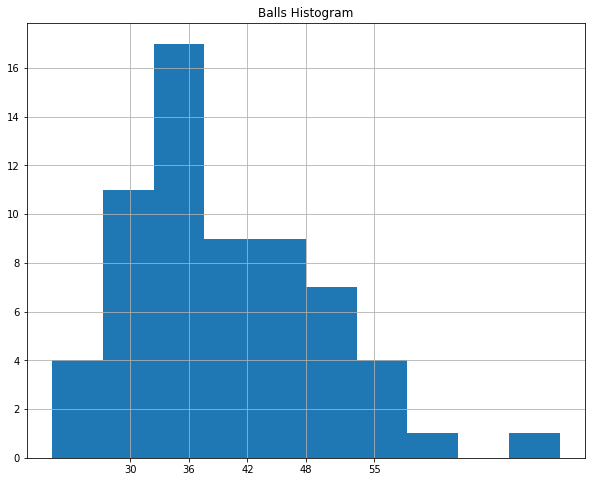

In [90]:
(srh_50['Balls']).hist(figsize=(10,8))
plt.xticks([30, 36, 42, 48, 55])
plt.title("Balls Histogram")

# Gayle score in first 10 balls

            Runs
count  43.000000
mean    9.046512
std     6.560900
min     0.000000
25%     4.500000
50%     8.000000
75%    13.500000
max    24.000000


Text(0.5, 1.0, 'Gayle Runs in first 10 balls')

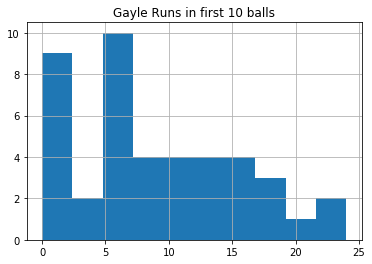

In [88]:
gayle_runs = list()
for match_id in delivery[(delivery['batsman']=='CH Gayle')]['match_id'].unique():
     
    runs = delivery[(delivery['batsman']=='CH Gayle') & (delivery['match_id']==match_id)][:10]['batsman_runs'].sum()
    gayle_runs.append(runs)   
    
print(pd.DataFrame(data=gayle_runs, columns=['Runs']).describe())
pd.DataFrame(data=gayle_runs, columns=['Runs']).hist()
plt.title('Gayle Runs in first 10 balls')

# Summary

- ing central tendency measures, the scores per match of both the teams were compared and the winning probability based on this and winner column was estimated. 
- Calculating Warner's total number of matches played and the total number of matches he got dismissed, the chances of getting dismissed was taken out. The strike rate of warner per match was calculated from past performances. Plotting histogram and considering mean values, the estimation was done.
- Rahul contribution per match was calculated using his score per match and teams score and then dividing it. Using the values calculated, taking mean and median values a range was calculated.
- The number of balls SRH team generally takes to score team's 50 against all teams was calculated, and using histogram the prediction of balls taken was done. 
- Gayle's score for first 10 balls per match was calculated using his played matches data and a histogram clearly indicated the past performances.  
